# TP 1 et 2 audio (M1 SID) [EMMAB1J1 - Extraction d'information dans les signaux Texte Audio et Vidéo]

**NOM** : kired

**Prénom** : Nour Elhouda

**Email** : nada.kired@gmail.com

**Partie 1** : Chargement fichier audio et comparaison de la variabilité 

Lien vers le support de cours : [cours.pdf](https://moodle.univ-tlse3.fr/pluginfile.php/256486/mod_resource/content/2/cours.pdf)

Initialisation de l'environnement de TP

In [ ]:
# OS setup
!cat /etc/os-release
!apt-get install -qq bc tree sox

# Liaison avec les données
!git clone https://gitlab.com/jeromefarinas/tp-3en-n7.git

NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic
Selecting previously unselected package libopencore-amrnb0:amd64.
(Reading database ... 144793 files and directories currently installed.)
Preparing to unpack .../0-libopencore-amrnb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing to unpack .../1-libopencore-amrwb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrwb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libmagic-mgc.
Preparing to unpack .../2-libmagic-mgc_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic-mgc (1:5.32-2ubuntu0.4)

In [ ]:
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
import scipy.signal
import numpy as np
from IPython.display import Audio

In [ ]:
!ls tp-3en-n7/signaux/


alpha		Loc1V1.wav	Loc1V2.wav	Loc2V1.wav
Loc1V1norm.wav	Loc1V2norm.wav	Loc2V1norm.wav


Utilisez la fonction scipy.io.wavfile.read pour charger le signal [Loc1V1.wav](https://www.irit.fr/~Jerome.Farinas/N73EN/res/Loc1V1.wav) (localisé ici : tp-3en-n7/signaux/Loc1V1.wav). Renseignez- vous sur l’utilisation de cette fonction en regardant la doumentation en ligne de scipy.io.
**Quelle est la fréquence d’échantillonage de ce fichier ? Est-ce bien en 16 KHz ?**

In [ ]:
sr, y = read("tp-3en-n7/signaux/Loc1V1.wav") 
##sr frequence d'echantillonage  le nb dechantillion par seconde
## y tableau des valeurs d signal


oui c'est bien 16000 KHZ 


In [ ]:
(fe,signal) =  read("tp-3en-n7/signaux/Loc1V1.wav") 
print(fe)

16000


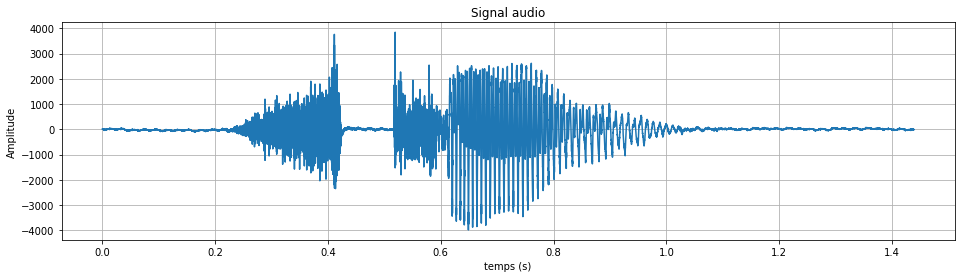

In [ ]:
# Affichage du signal
plt.figure(1, figsize=(16, 4))
plt.plot(np.arange(len(signal))/fe,signal)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()

In [ ]:
# lecture du fichier
Audio(data=signal, rate=fe)

***Affichage d'une partie des échantillons... (entre 9650 et 9700 par exemple)***

In [ ]:
# Affichage des échantillons entre 9650 et 9700
Audio(data=signal[9650:9700], rate=fe)

Affichage du spectrogramme  : 

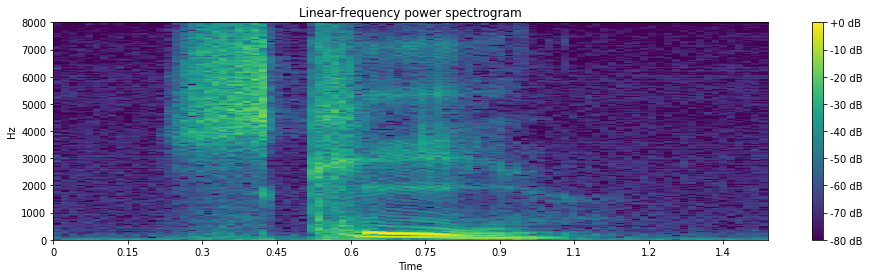

In [ ]:
import librosa
import librosa.display
d, sr = librosa.load('tp-3en-n7/signaux/Loc1V1.wav', sr=16000, mono=True)
sp = np.abs(librosa.stft(d, n_fft=512, hop_length=256, window=np.hanning(512 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
plt.figure(figsize=(16, 4))
librosa.display.specshow(sp, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

La lecture d'un enregistrement à 16 KHz forcée à 8 KHz va donner ceci :

In [ ]:
Audio(data=signal, rate=fe/2)

Et la lecture au double de la fréquence ceci :

In [ ]:
Audio(data=signal, rate=fe*2)

Q : ***Qu'obversez vous au niveau des fréquences ? Est-ce normal ?***

Votre réponse : Non c'est  pas normal 
avec la motié de la frequence on a l'audio qui est plus lent.
et avec une frequence qui est doublé, l'audio est rapide.
**Plus le son est aigu et plus la fréquence d’échantillonnage est élevée. Au contraire, plus le son est grave et plus elle est faible.**

Q : ***Conformément au théorème de Shannon, une fréquence échantillonnage de 16kHz est-elle adaptée à la numérisation de la parole ? Appuyez vous sur les valeurs théoriques de l’étendue du spectre de la parole.***

Une fréquence d'échantillonnage de 7 kHz suffit pour la transmission de la parole, mais elle ne donne pas satisfaction pour la musique. Avec cette fréquence, on ne peut reproduire les sons que jusqu'à 3 500 Hz .

**Votre réponse :**  d'apres le theorme de SHANNON :
la frequence d'ech = 2* frequence Maximal du signal analogique
(dans cette exemple le signal analogique= la frequence de la parole
donc dans la therie la frequence d'echntillonage doit etre au moins à 2*7KHZ =14KHZ<16KHZ


**---> donc 16KHZ est addapté à  la numérisation de la parole**
*texte en italique*

Q : ***Qu’est ce qu’un phonème ? Combien de phonèmes apparaissent dans le signal Loc1V1 ? Isolez-les dans des variables séparées.***

**Votre réponse:**, un phonème est la plus petite unité discrète ou distinctive que l'on puisse isoler par segmentation dans la chaîne parlée.
 
  
 le signal compte 3 phonèmes 
 

In [ ]:
s = signal[3000:6600]
k = signal[8299:9000]
i = signal[10000:14000]

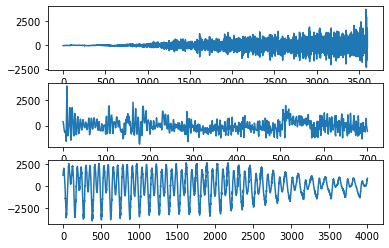

In [ ]:
plt.subplot(311)
plt.plot(s)
plt.subplot(312)
plt.plot(k)
plt.subplot(313)
plt.plot(i)
plt.show()

Q : ***Quelle est la différence entre un son voisé et un son non-voisé ?***




Votre réponse : Un son est voisé si sa production s'accompagne d'une vibration des cordes vocales et sinon, il est non voisé.

***Isolez dans des variables séparées une fenetre de 512 poits de signal voisé et une autre avec du signal non voisé. Affichez les fenêtres.***

No handles with labels found to put in legend.


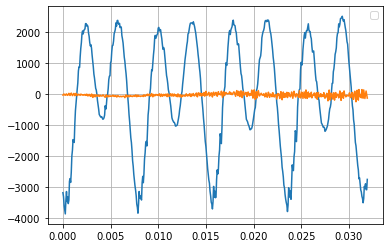

In [ ]:
s = signal[3000:6600]
k = signal[8299:9000]
i = signal[10000:14000]
Audio(data = i, rate = fe)
voise = i[500:1012]
non_voise = s[500:1012]
plt.plot(np.arange(len(voise))/fe,voise)
plt.plot(np.arange(len(non_voise))/fe,non_voise)
plt.grid()
plt.legend()

**Le même mot est prononcé une nouvelle fois par le même locuteur : Loc1V2.wav. Affichez les signaux, écoutez les, et observerez les différences existantes entre ces deux réalisations.**

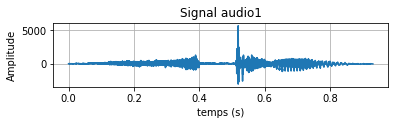

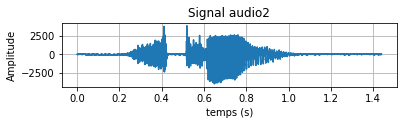

In [ ]:
(fe2,signal2) =  read("tp-3en-n7/signaux/Loc1V2.wav") 
# Affichage du signal
plt.subplot(311)
plt.figure(1, figsize=(16, 4))
plt.plot(np.arange(len(signal2))/fe2,signal2)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio1')
plt.grid(True)
plt.show()


plt.subplot(312)
# Affichage du signal
plt.figure(1, figsize=(16, 4))
plt.plot(np.arange(len(signal))/fe,signal)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio2')
plt.grid(True)
plt.show()

Affichage du spectrogramme  : 



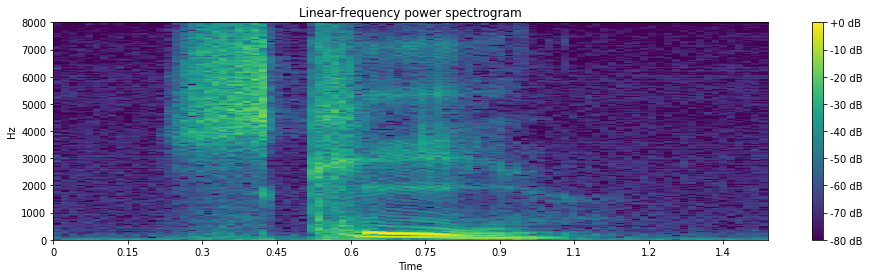

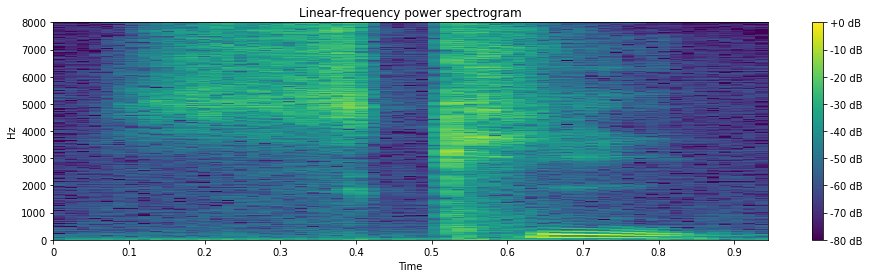

In [ ]:
import librosa
import librosa.display
d, sr = librosa.load('tp-3en-n7/signaux/Loc1V1.wav', sr=16000, mono=True)
sp = np.abs(librosa.stft(d, n_fft=512, hop_length=256, window=np.hanning(512 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
plt.figure(figsize=(16, 4))
librosa.display.specshow(sp, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

d, sr = librosa.load('tp-3en-n7/signaux/Loc1V2.wav', sr=16000, mono=True)
sp = np.abs(librosa.stft(d, n_fft=1024, hop_length=256, window=np.hanning(1024 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
plt.figure(figsize=(16, 4))
librosa.display.specshow(sp, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()


In [ ]:

Audio(data=signal2, rate=fe2)


***Comparez ensuite les réalisation du même mot par deux locuteurs différents (fichiers Loc1V1 et Loc2V1). Discutez les causes possibles des différences observées entre deux réalisations.***

Votre réponse :
moins d'energie
plus posé
difference de frequences
de signal

***Enregistrez votre propre voix (vous pouvez utiliser le programme wavesurfer). Utilisez par exemple cette phrase : "Le public est ému par Debussy". Affichez le signal, le spectrogramme et repérez les différents phonèmes qui composent votre production. Comparez avec ce qui a été fait en cours.***

il y a 20 phonemes.
l , e(à l'envers), p , y ,b,l,i,k,E,t,e,m,y,p,a,R,d,a,b,y,s,i.


In [ ]:
from google.colab import files
uploaded = files.upload()
!ls

Saving maVoix2.wav to maVoix2.wav
maVoix2.wav  sample_data


In [ ]:
fe,signal = read("maVoix2.wav") 

In [ ]:
Audio(data=signal[1000:38000],rate=fe)

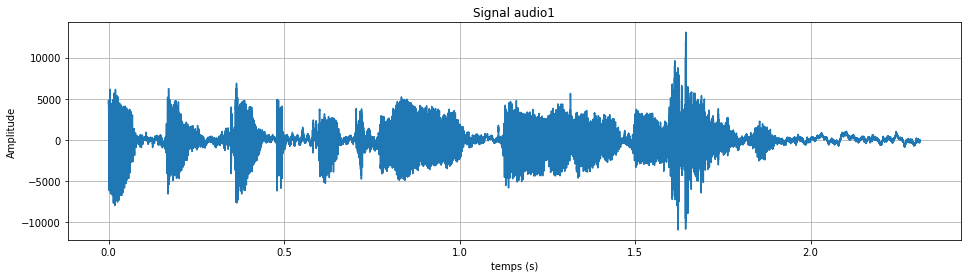

In [ ]:
signal=signal[1000:38000]
plt.figure(1, figsize=(16, 4))
plt.plot(np.arange(len(signal))/fe,signal)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio1')
plt.grid(True)
plt.show()

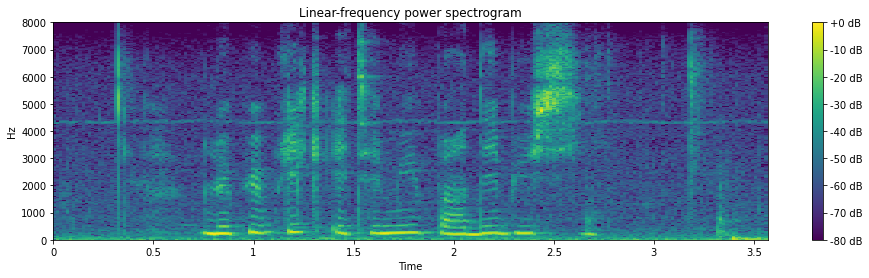

In [ ]:
d, sr = librosa.load('maVoix2.wav', sr=16000, mono=True)
sp = np.abs(librosa.stft(d, n_fft=512, hop_length=256, window=np.hanning(512 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
plt.figure(figsize=(16, 4))
librosa.display.specshow(sp, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

***Concluez sur cette partie en prenant en considération le nombre important de causes extérieures de la variabilité temporelle du signal de parole. Ces phénomènes limitent les possibilités d’une analyse plus poussée dans le domaine temporel dans lequel le signal de parole se comporte comme un signal aléatoire.***

Votre réponse...

**Partie 2** : Paramétrisation

In [ ]:
!tree tp-3en-n7/signaux/alpha/

tp-3en-n7/signaux/alpha/
├── mots_inconnus
│   ├── alpha.wav
│   ├── bravo.wav
│   ├── charlie.wav
│   ├── delta.wav
│   ├── echo.wav
│   ├── foxtrott.wav
│   ├── golf.wav
│   ├── hotel.wav
│   ├── india.wav
│   ├── juliett.wav
│   ├── kilo.wav
│   ├── lima.wav
│   └── mike.wav
└── references
    ├── alpha.wav
    ├── bravo.wav
    ├── charlie.wav
    ├── delta.wav
    ├── echo.wav
    ├── foxtrott.wav
    ├── golf.wav
    ├── hotel.wav
    ├── india.wav
    ├── juliett.wav
    ├── kilo.wav
    ├── lima.wav
    └── mike.wav

2 directories, 26 files


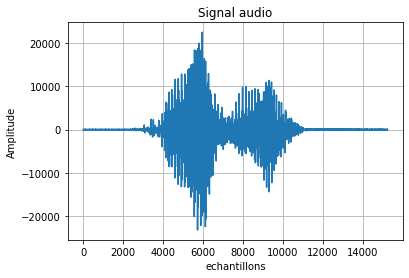

In [ ]:
(fe,signal) =  scipy.io.wavfile.read("tp-3en-n7/signaux/alpha/references/bravo.wav")
# Affichage du signal
signal = np.array(signal).astype(int)
plt.figure(1)
plt.plot(np.arange(len(signal)),signal)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()
# lecture du fichier
Audio(data=signal, rate=fe)

Nous allons commencer par travailler sur un extrait voisé du signal :

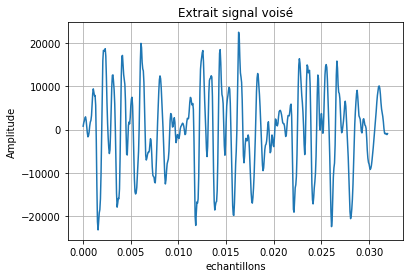

In [ ]:
extrait = signal[5700:6212]
# Affichage du signal
plt.figure(1)
plt.plot(np.arange(0, len(extrait)/fe, 1/fe),extrait)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Extrait signal voisé')
plt.grid(True)
plt.show()

***Affichez une fenetre hamming de 512 points. Puis créez la variable extrait_fenetre qui resulte de la multiplication point par point de la fenetre de hamming et de l'extrait de signal. Affichez le signal résultant.***

In [ ]:
import librosa
import librosa.display

In [ ]:
window=np.hamming(512)
window


array([0.08      , 0.08003477, 0.08013909, 0.08031292, 0.08055626,
       0.08086906, 0.08125127, 0.08170284, 0.0822237 , 0.08281376,
       0.08347295, 0.08420116, 0.08499828, 0.08586418, 0.08679875,
       0.08780184, 0.08887329, 0.09001294, 0.09122063, 0.09249617,
       0.09383936, 0.09525001, 0.09672789, 0.0982728 , 0.09988448,
       0.10156271, 0.10330722, 0.10511775, 0.10699403, 0.10893578,
       0.1109427 , 0.11301448, 0.11515082, 0.11735139, 0.11961586,
       0.12194389, 0.12433512, 0.12678919, 0.12930573, 0.13188437,
       0.13452471, 0.13722635, 0.13998888, 0.14281189, 0.14569495,
       0.14863762, 0.15163946, 0.15470002, 0.15781883, 0.16099542,
       0.16422931, 0.16752001, 0.17086702, 0.17426984, 0.17772796,
       0.18124085, 0.18480797, 0.1884288 , 0.19210278, 0.19582935,
       0.19960796, 0.20343803, 0.20731899, 0.21125024, 0.2152312 ,
       0.21926125, 0.2233398 , 0.22746622, 0.2316399 , 0.23586019,
       0.24012646, 0.24443807, 0.24879437, 0.25319469, 0.25763

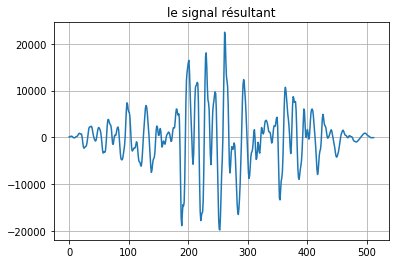

In [ ]:
extrait_fenetre=extrait*window
extrait_fenetre
plt.plot(np.arange(len(extrait_fenetre)),extrait_fenetre)
plt.title('le signal résultant')
plt.grid(True)
plt.show()

***Affichez le spectre de puissance de la transformée de Fourier de l'extrait fenetré. Représentez les fréquences en abscisse. Vous pouvez utiliser la fonction np.fft.fft pour calculer la transformée de Fourier ou bien utiliser son équivalent sur librosa.***

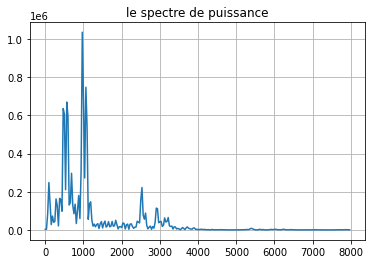

In [ ]:
plt.plot(np.fft.fftfreq(512,1/fe)[:256],abs(np.fft.fft(extrait_fenetre)[:256]))
plt.title('le spectre de puissance')
plt.grid()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'transformé de fourier')

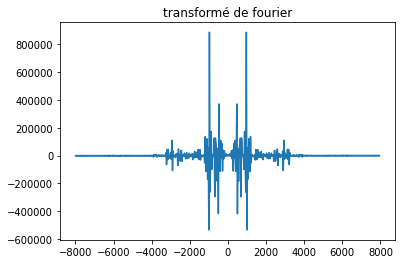

In [ ]:
plt.plot(np.fft.fftfreq(512,1/fe),np.fft.fft(extrait_fenetre)) ## ttransforme de fourier
plt.title('transformé de fourier')

***Affichez un spectrogramme du signal de départ.***

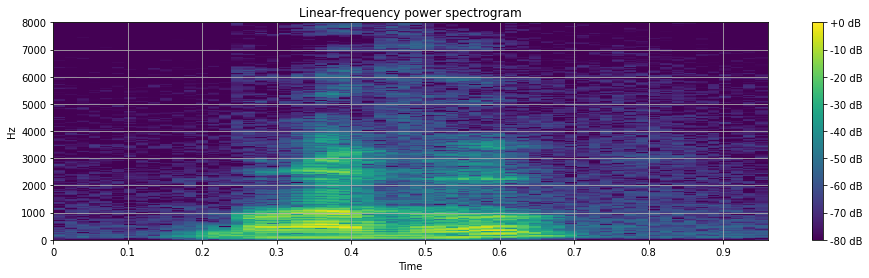

In [ ]:
import librosa
import librosa.display
d, sr = librosa.load('tp-3en-n7/signaux/alpha/references/bravo.wav', sr=16000, mono=True)
sp = np.abs(librosa.stft(d, n_fft=512, hop_length=256, window=np.hanning(512 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
plt.figure(figsize=(16, 4))
librosa.display.specshow(sp, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.grid()

***Calculez le log énergie du signal sur des fenêtres de 512 points avec recouvrement sur la moitié. Affichez les valeurs ainsi calculées aligné avec le signal.***

$E=\log\left(\sum_{i=1}^{n}x_{i}^{2}\right)$

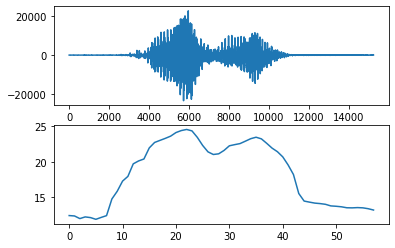

In [ ]:
import math
energie=[]
j=0
while (j+512)<=len(signal):
  resultat=0
  for i in (signal[j:j+512]):
    resultat+=pow(i,2)
  energie.append(math.log(resultat))
  j+=256

plt.subplot(212)
plt.plot(energie)
plt.subplot(211)
plt.plot(signal)

***Peut-on repérer les voyelles facilement avec cette représentation ?***

Réponse: là où il ya des piques on trouve des voyelles, donc ici deux voyelles




---



---





***Calculez le cepstre de l'extrait de signal. Affichez le. Où se trouve l'excitation liée à la vibration des cordes vocales ?***

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


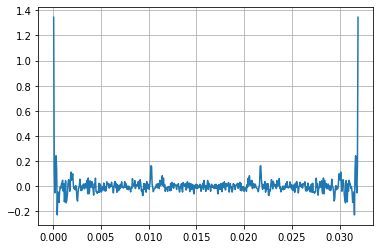

In [ ]:
plt.plot(np.arange(0, len(extrait)/fe, 1/fe)[1:],np.fft.ifft([math.log(x) for x in abs(np.fft.fft(extrait))])[1:])
plt.grid()


Réponse...
la frequence fondamentales c'est 1/T0 = 1/0.010
T0=0.010



***En utilisant librosa, affichez une matrice des 12 premiers coefficients MFCC 
du signal de départ.***

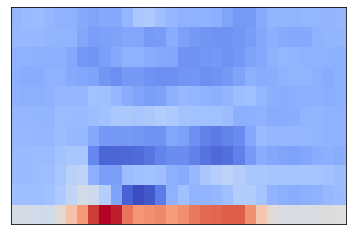

In [ ]:
librosa.display.specshow(librosa.feature.mfcc(signal.astype(float),sr=fe)[1:12])

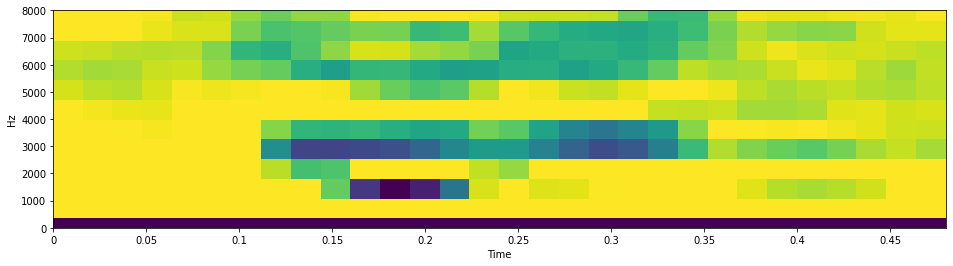

In [ ]:
d, sr = librosa.load('tp-3en-n7/signaux/alpha/references/bravo.wav', sr=16000, mono=True) 
Matrice = librosa.feature.mfcc(y=d, sr=sr, n_mfcc=12)
plt.figure(figsize=(16, 4))
librosa.display.specshow(Matrice, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.show()



```
# Ce texte est au format code
```

***Ajoutez a cette matrice votre propre calcul de l'énergie normalisé. Y a-t-il une corrélation avec un des coefficients MFCC ?***


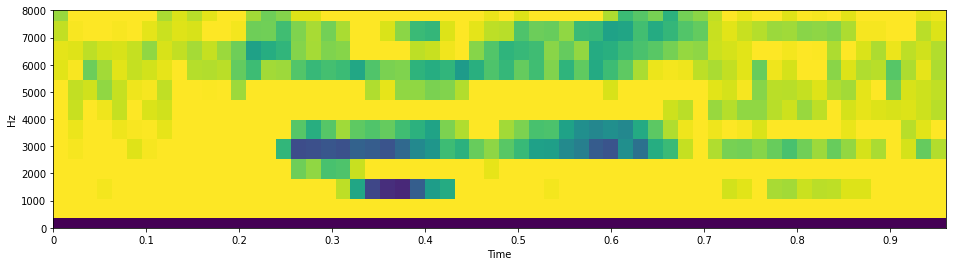

In [ ]:
d, sr = librosa.load('tp-3en-n7/signaux/alpha/references/bravo.wav', sr=16000, mono=True) 
Matrice = librosa.feature.mfcc(y=d, sr=sr, n_mfcc=12, hop_length = 256, n_fft = 512)
plt.figure(figsize=(16, 4))
librosa.display.specshow(Matrice, sr=16000, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0,hop_length=256)
plt.show()

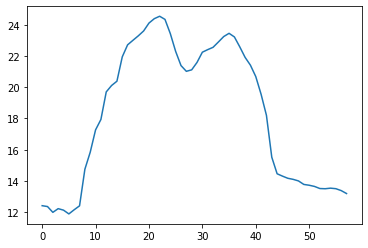

In [ ]:
energie = [0] + energie + [0]
mfcc = np.concatenate((Matrice,[energie]), axis = 0)
plt.plot(energie[1:59])

Réponse...

***En utilisant les MFCC, mettez en place un détecteur d'activité vocale afin de filtrer les fichiers que vous avez à traiter : visualisez le résultats sur les signaux "references" (affichage du signal et matérialisation des zones de silence). Vous ne devez pas altérer les zones de silences de moins de 300 ms comprises dans les zones de parole.***

In [ ]:
# A vous...